In [120]:
# Install pandas for data manipulation
!pip install pandas

# Install numpy for numerical operations
!pip install numpy

# Install matplotlib for data visualization
!pip install matplotlib

# Install seaborn for advanced visualizations
!pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries installed successfully!")


Libraries installed successfully!


In [122]:
# Load the dataset
import pandas as pd

# Provide the correct file path to the CSV
file_path = r'C:\Users\rahul\PyCharmMiscProject\.venv\CreditCardData.csv'

try:
    # Load the dataset
    data = pd.read_csv(file_path)  # Replace with your dataset path

    # View the first few rows
    print(data.head())

except PermissionError:
    print(f"Permission denied: Unable to access the file at {file_path}.")
except FileNotFoundError:
    print(f"The file does not exist at the specified path: {file_path}.")
except Exception as e:
    print(f"An error occurred: {str(e)}")



  Transaction ID       Date Day of Week  Time Type of Card Entry Mode Amount  \
0      #3577 209  14-Oct-20   Wednesday    19         Visa        Tap     £5   
1      #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   £288   
2      #2694 780  14-Oct-20   Wednesday    14         Visa        Tap     £5   
3      #2640 960  13-Oct-20     Tuesday    14         Visa        Tap    £28   
4      #2771 031  13-Oct-20     Tuesday    23         Visa        CVC    £91   

  Type of Transaction Merchant Group Country of Transaction Shipping Address  \
0                 POS  Entertainment         United Kingdom   United Kingdom   
1                 POS       Services                    USA              USA   
2                 POS     Restaurant                  India            India   
3                 POS  Entertainment         United Kingdom            India   
4              Online    Electronics                    USA              USA   

  Country of Residence Gender   Age   

In [123]:
columns = data.columns
print("Columns in the dataset:")
print(columns)


Columns in the dataset:
Index(['Transaction ID', 'Date', 'Day of Week', 'Time', 'Type of Card',
       'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group',
       'Country of Transaction', 'Shipping Address', 'Country of Residence',
       'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')


In [124]:
import pandas as pd

# Display the first few rows of the Amount column
print(data['Amount'].head())

# Remove the '£' symbol and any spaces, then convert to numeric
data['Amount'] = data['Amount'].str.replace('£', '').str.strip()

# Convert the cleaned 'Amount' column to numeric
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Verify the changes
print(data['Amount'].head())
print(data.info())


0      £5
1    £288
2      £5
3     £28
4     £91
Name: Amount, dtype: object
0      5.0
1    288.0
2      5.0
3     28.0
4     91.0
Name: Amount, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   float64
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence 

In [125]:
# Calculate Z-scores for the 'Amount' column
data['Z_Score'] = (data['Amount'] - data['Amount'].mean()) / data['Amount'].std()

# Identify outliers (absolute Z_Score > 3)
outliers = data[data['Z_Score'].abs() > 3]

# Save outliers to a CSV for review
outliers.to_csv('outliers.csv', index=False)

# Display outliers
print(f"Number of outliers detected: {len(outliers)}")
print(outliers)


Number of outliers detected: 0
Empty DataFrame
Columns: [Transaction ID, Date, Day of Week, Time, Type of Card, Entry Mode, Amount, Type of Transaction, Merchant Group, Country of Transaction, Shipping Address, Country of Residence, Gender, Age, Bank, Fraud, Z_Score]
Index: []


In [126]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for any null values after conversion (indicating invalid dates)
print(data['Date'].isnull().sum())

# Drop rows with invalid dates, if necessary
data = data.dropna(subset=['Date'])

# Verify the conversion
print(data['Date'].head())


0
0   2020-10-14
1   2020-10-14
2   2020-10-14
3   2020-10-13
4   2020-10-13
Name: Date, dtype: datetime64[ns]


C:\Users\rahul\AppData\Local\Temp\ipykernel_3860\1980098622.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


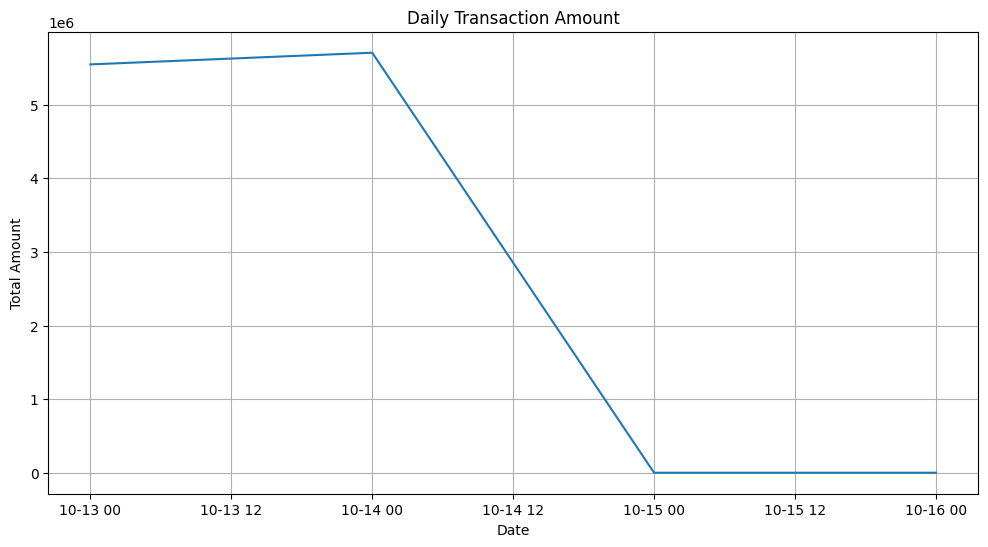

In [127]:
# Aggregate data by day
daily_transactions = data.groupby(data['Date'].dt.date)['Amount'].sum()

# Plot daily transaction trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='line', title='Daily Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid()
plt.show()


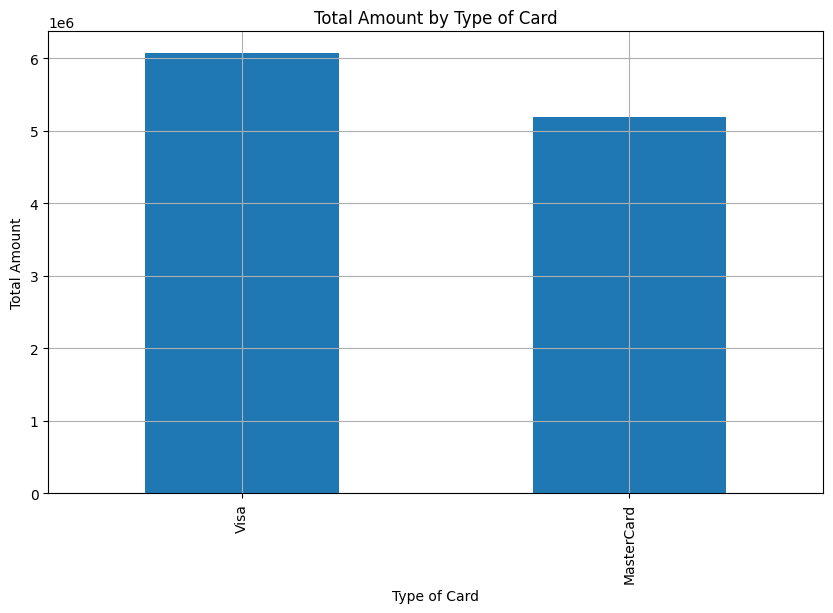

In [128]:
# Bar plot for total amount by type of card
category_totals = data.groupby('Type of Card')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_totals.plot(kind='bar', title='Total Amount by Type of Card')
plt.xlabel('Type of Card')
plt.ylabel('Total Amount')
plt.grid()
plt.show()


In [129]:
print(data['Type of Transaction'].head(10))
print(data['Type of Transaction'].value_counts())


0       POS
1       POS
2       POS
3       POS
4    Online
5       POS
6    Online
7    Online
8       ATM
9       POS
Name: Type of Transaction, dtype: object
Type of Transaction
Online    33481
ATM       33274
POS       33245
Name: count, dtype: int64


In [130]:
# Get the first 10 values from the 'Type of Transaction' column
sample_values = outliers['Type of Transaction'].head(10)
print(sample_values)


Series([], Name: Type of Transaction, dtype: object)


In [131]:
# Recreate the outliers DataFrame, including the 'Type of Transaction' column
outliers = data[data['Z_Score'].abs() > 3]


In [132]:
print(outliers['Type of Transaction'].head(10))
print(outliers['Type of Transaction'].unique())



Series([], Name: Type of Transaction, dtype: object)
[]


In [133]:
print(data[data['Z_Score'].abs() > 3].shape)


(0, 17)


In [134]:
print(data['Z_Score'].describe())  # Summary statistics
print(data['Z_Score'].head(10))   # First 10 Z-Score values


count    9.999400e+04
mean    -1.474465e-17
std      1.000000e+00
min     -8.715476e-01
25%     -7.743296e-01
50%     -6.690100e-01
75%      7.730574e-01
max      2.328546e+00
Name: Z_Score, dtype: float64
0   -0.871548
1    1.421178
2   -0.871548
3   -0.685213
4   -0.174818
5   -0.669010
6    0.959392
7    0.335576
8   -0.596097
9   -0.774330
Name: Z_Score, dtype: float64


In [135]:
outliers = data[data['Z_Score'].abs() > 2]
print(outliers.shape)  # Check if outliers are now present


(5214, 17)


In [136]:
print(outliers['Type of Transaction'].head(10))
print(outliers['Type of Transaction'].unique())


20     Online
27     Online
30     Online
126       POS
142       POS
159    Online
177    Online
194       POS
213       ATM
242    Online
Name: Type of Transaction, dtype: object
['Online' 'POS' 'ATM']


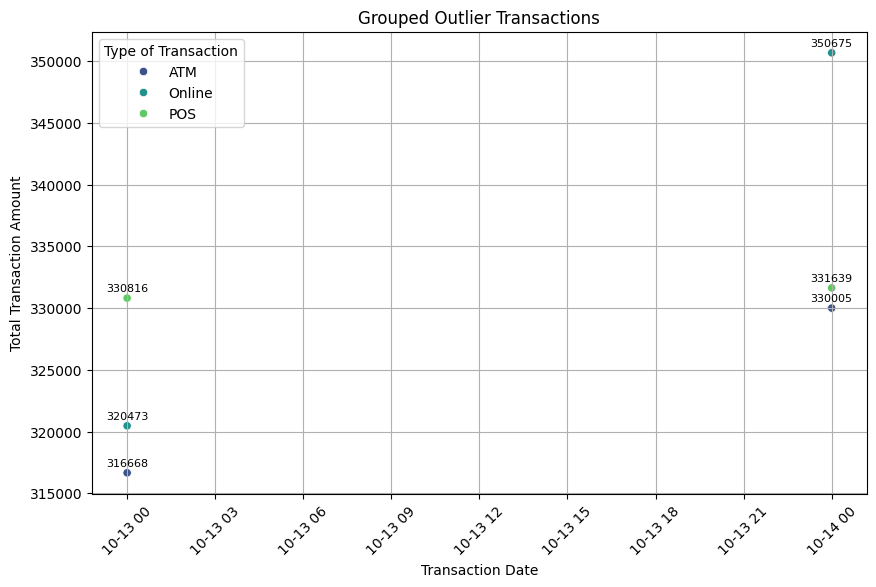

In [140]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=grouped, x='Date', y='Amount', hue='Type of Transaction', palette='viridis')
plt.title('Grouped Outlier Transactions')
plt.xlabel('Transaction Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)

# Add annotations
for i in range(len(grouped)):
    plt.text(x=grouped['Date'].iloc[i], y=grouped['Amount'].iloc[i] + 500,
             s=f"{int(grouped['Amount'].iloc[i])}",
             ha='center', fontsize=8)

plt.grid()
plt.show()


In [141]:
outlier_percentage = (len(outliers) / len(data)) * 100
print(f"Outliers represent {outlier_percentage:.2f}% of the total data.")


Outliers represent 5.21% of the total data.


In [142]:
summary = outliers.groupby('Type of Transaction')['Amount'].agg(['mean', 'sum', 'count'])
print(summary)


                           mean       sum  count
Type of Transaction                             
ATM                  379.948884  646673.0   1702
Online               379.823430  671148.0   1767
POS                  379.630372  662455.0   1745


In [143]:
!pip install scikit-learn
%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Type of Transaction Encoded'] = encoder.fit_transform(data['Type of Transaction'])



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount Scaled'] = scaler.fit_transform(data[['Amount']])


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and labels
X = data[['Amount Scaled', 'Type of Transaction Encoded']]
y = data['Fraud']  # Assuming 'Fraud' is a binary column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
print(f"Model Accuracy: {model.score(X_test, y_test):.2f}")


Model Accuracy: 0.93


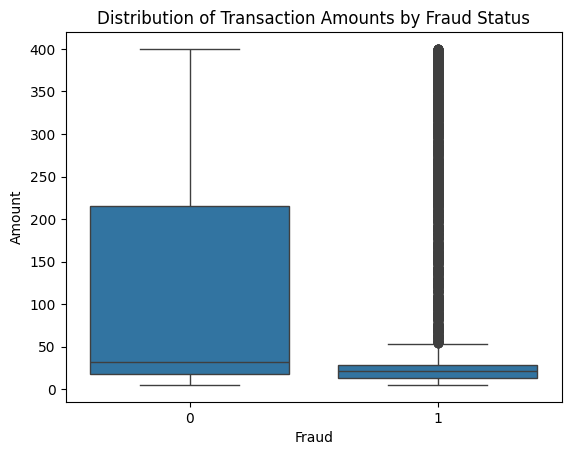

In [146]:
sns.boxplot(data=data, x='Fraud', y='Amount')
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.show()


In [147]:
data.to_csv('cleaned_CreditCardData.csv', index=False)
